In [1]:
#!/usr/bin/env python
# coding: utf-8
import sys
sys.path.insert(0, '../py')
from graviti import *

import numpy as np
import scipy as sp
from scipy.sparse import coo_matrix

from skimage.draw import polygon
from skimage import io
from skimage.measure import label, regionprops
import skimage.io
import skimage.measure
import skimage.color

import glob
import pandas as pd
import os
import timeit
import random

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import timeit
import multiprocessing
from joblib import Parallel, delayed
from datetime import datetime
from tqdm import tqdm

In [2]:
sample_id = "../data/TCGA-05-4244-01Z-00-DX1.d4ff32cd-38cf-40ea-8213-45c2b100ac01.svs.tar.gz" #sys.argv[1]
svs_filename = "../data/TCGA-05-4244-01Z-00-DX1.d4ff32cd-38cf-40ea-8213-45c2b100ac01.svs" #sys.argv[2];

print( os.path.basename(svs_filename) )

patches = glob.glob(sample_id+'/*_polygon/*/*.csv')

num_cores = multiprocessing.cpu_count() # numb of cores

# fraction of nuclei to be processed hardcoded to 0.1

generated_covds = Parallel(n_jobs=num_cores)( delayed(process_patch_with_intensity)(p,0.1,svs_filename) for p in tqdm(patches) )

  0%|          | 0/132 [00:00<?, ?it/s]

TCGA-05-4244-01Z-00-DX1.d4ff32cd-38cf-40ea-8213-45c2b100ac01.svs


100%|██████████| 132/132 [01:32<00:00,  1.42it/s]


In [3]:
files = glob.glob('../data/TCGA-05-4244-01Z-00-DX1.*.svs.tar.gz/luad_polygon/TCGA-05-4244-01Z-00-DX1.*.svs/*.morphometrics+intensity.pkl')
appended_data = []
for f in files:
    appended_data.append(pd.read_pickle(f))
feature_data = pd.concat(appended_data)

In [4]:
feature_data.head()

,cx,cy,area,eccentricity,orientation,perimeter,solidity,intensity_R,intensity_G,intensity_B
0,14765.257060,24011.758870,1381,0.913270,0.002177,163.740115,0.969803,212123,183868,275987
1,14894.464195,24015.971356,1187,0.658316,-0.359490,134.568542,0.963474,147661,117180,214267
2,15457.035061,24009.585366,656,0.847296,0.004480,103.112698,0.968981,76663,61907,116155
3,14225.275550,24044.564467,2319,0.764774,0.209218,218.994949,0.896059,377067,330213,480748
4,13569.644725,24059.482417,1109,0.950205,-0.562549,162.852814,0.872541,126863,103166,183707


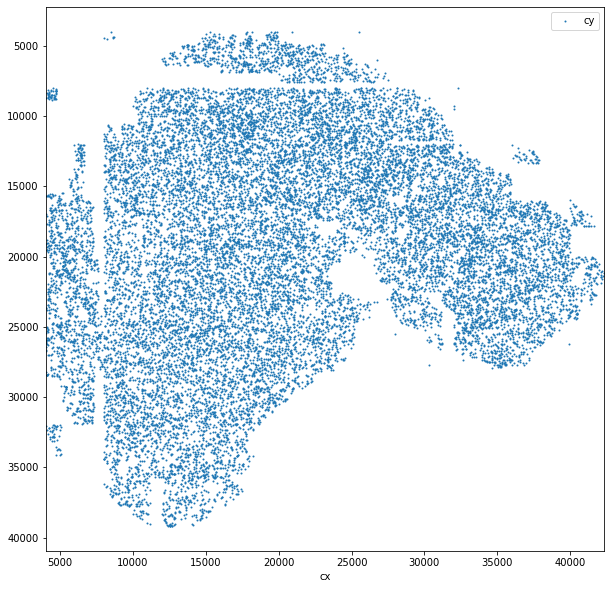

In [5]:
feature_data.plot(x='cx', y='cy', style='o',markersize=1,figsize=(10, 10))
plt.gca().invert_yaxis()

In [6]:
def get_LogCovMat_parallel(featureMat):
    out = np.real(sp.linalg.logm(np.cov(featureMat,rowvar=False))).flatten()
    return out
def get_LogCorrMat_parallel(featureMat):
    return np.real(sp.linalg.logm(np.corrcoef(featureMat,rowvar=False))).flatten()
def get_position_parallel(featureMat):
    pos = featureMat[0]
    return pos

In [7]:
num_cores = multiprocessing.cpu_count() # numb of cores

In [10]:
pos = feature_data[['cx','cy']].to_numpy()

In [17]:
morphometry = feature_data.columns[2:7]
get_LogCovMat_parallel(feature_data[morphometry].to_numpy())

(25,)